## Group 11: HW 2_K-Means

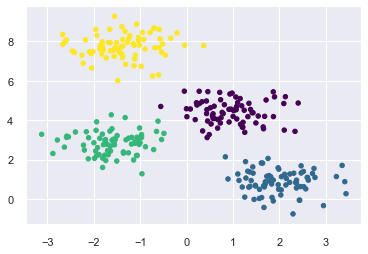

In [16]:
# Housekeeping
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import mode

# Simulate dataset with 4 random clusters
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)
# Visualize dataset
plt.scatter(X[:, 0], X[:, 1],c=y_true, s=20, cmap='viridis');

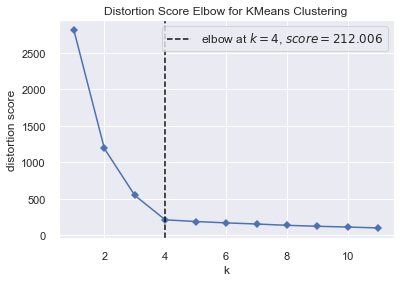

In [17]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,12), timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

In [18]:
# Model Fit and Predictions for K = 4 (Best K)
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(X)
print(y_pred)

[0 1 3 1 0 0 2 3 1 1 2 1 3 1 0 3 3 0 2 2 0 0 3 2 2 3 0 3 2 3 1 1 3 1 1 1 1
 1 2 0 3 2 3 3 2 2 1 2 1 0 2 0 1 0 0 2 1 2 1 0 1 3 1 2 2 2 1 0 1 2 3 2 1 2
 2 1 2 3 0 1 0 3 0 0 1 3 0 3 1 1 3 0 1 2 2 3 0 0 3 2 1 0 1 0 3 0 0 3 1 3 2
 2 0 1 0 3 1 0 0 3 2 0 2 0 0 0 0 2 0 2 1 2 2 0 1 2 2 1 3 1 1 2 3 2 3 2 1 3
 1 1 1 3 1 3 0 2 1 2 0 3 1 3 3 0 3 2 2 3 0 3 3 1 0 3 2 1 0 0 3 2 0 3 2 2 3
 3 3 3 0 1 3 2 3 3 2 2 2 3 2 1 3 2 0 2 3 1 2 1 3 1 3 2 3 3 1 2 2 0 0 3 1 0
 0 2 0 2 3 1 1 3 3 1 3 0 2 3 0 2 1 2 0 3 0 1 1 1 1 2 2 1 3 2 0 3 2 2 2 0 0
 1 3 3 2 0 1 2 3 1 3 0 0 2 2 3 0 0 0 3 1 1 0 0 3 0 0 0 1 2 1 3 0 0 1 1 1 0
 0 3 1 2]


In [19]:

#        create a zero matrix with the same shape
labels = np.zeros_like(y_pred)
for i in range(3):
    mask = (y_pred == i) 
    labels[mask] = mode(y_true[mask])[0]
    


In [20]:
# Accuracy Score for K-Means with K = 4 (Best K)
accuracy_score(labels, y_true)

1.0

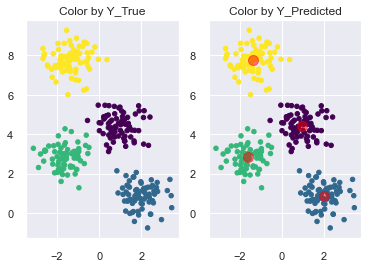

In [21]:
# Visualize Results Side by Side - red circle represents cluster centroid 

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1],c=y_true, s=20, cmap='viridis');
plt.title('Color by Y_True')
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis')
plt.title('Color by Y_Predicted')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

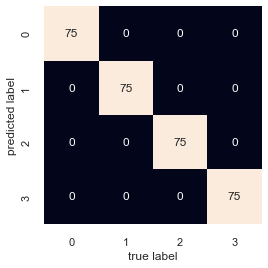

In [22]:
# Confusion Matrix - White (diagonals) represents accurate predictions, black (non-diagonal) = errors 
mat = confusion_matrix(y_true, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=(0,1,2,3),
            yticklabels=(0,1,2,3))
plt.xlabel('true label')
plt.ylabel('predicted label');